In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from butiran.color2 import Color2
from butiran.math.vect3 import Vect3
from butiran.grain import Grain
from butiran.force.normal2 import Normal2
import math

ModuleNotFoundError: No module named 'butiran'

In [8]:
tbeg = 0
tend = 3
dt = 0.01
t = np.arange(tbeg, tend, dt)

In [9]:
m1 = 0.2
d1 = 1.0
x10 = -2
v10 = 1
y10 = 0
u10 = 0

m2 = 0.1
d2 = 0.5
x20 = 2
v20 = -2
y20 = 0
u20 = 0

# define normal force
m1 = 2; R1 = 1
m2 = 1; R2 = 1
k = 1000; d = 0
normal = Normal2(constant=k, damping=d)

# define grain with initial position and velocity
grain1 = Grain(id="0000", m=m1, d=2*R1)
grain1.r = Vect3(-3, 0, 0)
grain1.v = Vect3(1, 0, 0)

grain2 = Grain(id="0001", m=m2, d=2*R2)
grain2.r = Vect3(3, 0, 0)
grain2.v = Vect3(-1, 0)

import numpy as np

# define iteration
tbeg = 0
tend = 4
N = 5000
dt = (tend - tbeg) / N

# define lists
data_t = []

t0 = []
x1 = []
y1 = []
x2 = []
y2 = []


# perform iteration
print("Calculate position and velocity.")
for i in range(N + 1):
  t = i * dt
  
  m1 = grain1.m; v1 = grain1.v; r1 = grain1.r
  m2 = grain2.m; v2 = grain2.v; r2 = grain2.r
  
  t0.append(t)
  x1.append(r1.x)
  y1.append(r1.y)
  x2.append(r2.x)
  y2.append(r2.y)

  fn12 = normal.force(grain1, grain2)
  fn21 = normal.force(grain2, grain1)
  
  #print(fn12.x)

  a1 = fn12 / m1; v1 += a1 * dt; r1 += v1 * dt
  a2 = fn21 / m2; v2 += a2 * dt; r2 += v2 * dt
   
  grain1.v = v1; grain1.r = r1
  grain2.v = v2; grain2.r = r2

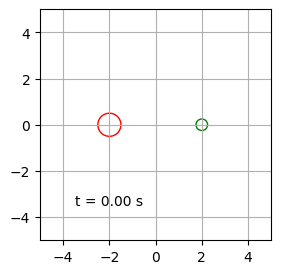

In [10]:
# without collision
x1 = x10 + v10 * t
y1 = y10 + u10 * t

x2 = x20 + v20 * t
y2 = y20 + u20 * t

fig = plt.figure(figsize=(3,3))
ax = fig.gca()
ax.set_aspect(1)
plt.grid()
plt.xlim(-5, 5)
plt.ylim(-5, 5)

c1 = plt.Circle((x1[0], y1[0]), 0.5*d1, fc='none', ec='red', lw=1)
ax.add_patch(c1)
c2 = plt.Circle((x2[0], y2[0]), 0.5*d2, fc='none', ec='green', lw=1)
ax.add_patch(c2)

ts = f't = {t[0]:.2f} s'
tx = ax.text(-3.5, -3.5, ts)

plt.show()

def update(i):
    c1.center = x1[i], y1[i]
    c2.center = x2[i], y2[i]
    ts = f't = {t[i]:.2f} s'
    tx.set_text(ts)
    return _

ani = animation.FuncAnimation(fig=fig, func=update, frames=300)
ani.save(filename="test2a.mp4", writer="ffmpeg", fps=50)

<video src="test2a.mp4" controls></video>

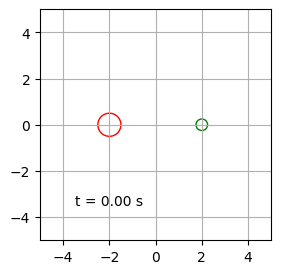

In [21]:
m1 = 0.2
d1 = 1.0
x10 = -2
v10 = 1
y10 = 0
u10 = 0

m2 = 0.1
d2 = 0.5
x20 = 2
v20 = -2
y20 = 0
u20 = 0

# without collision with iteration
x1 = []
y1 = []
x2 = []
y2 = []
for i, tt in enumerate(t):
    if i == 0:
        x1.append(x10)
        y1.append(y10)
        x2.append(x20)
        y2.append(y20)
    else:
        x1.append(x1[i-1] + v10 * dt)
        y1.append(y1[i-1] + u10 * dt)
        x2.append(x2[i-1] + v20 * dt)
        y2.append(y2[i-1] + u20 * dt)

fig = plt.figure(figsize=(3,3))
ax = fig.gca()
ax.set_aspect(1)
plt.grid()
plt.xlim(-5, 5)
plt.ylim(-5, 5)

c1 = plt.Circle((x1[0], y1[0]), 0.5*d1, fc='none', ec='red', lw=1)
ax.add_patch(c1)
c2 = plt.Circle((x2[0], y2[0]), 0.5*d2, fc='none', ec='green', lw=1)
ax.add_patch(c2)

ts = f't = {t[0]:.2f} s'
tx = ax.text(-3.5, -3.5, ts)

plt.show()

def update(i):
    c1.center = x1[i], y1[i]
    c2.center = x2[i], y2[i]
    ts = f't = {t[i]:.2f} s'
    tx.set_text(ts)
    return _

ani = animation.FuncAnimation(fig=fig, func=update, frames=300)
ani.save(filename="test2b.mp4", writer="ffmpeg", fps=50)

<video src="test2b.mp4" controls></video>

In [22]:
print(v10, v20)

1 -2


url https://phys.libretexts.org/@go/page/18227

$$\tag{1}
v_{1f} = \left( \frac{m_1 - m_2}{m_1 + m_2} \right) v_{1i} + \left( \frac{2m_2}{m_1 + m_2} \right) v_{2i}
$$

$$\tag{2}
v_{2f} = \left( \frac{2m_1}{m_1 + m_2} \right) v_{1i} + \left( \frac{m_2 - m_1}{m_1 + m_2} \right) v_{2i}
$$

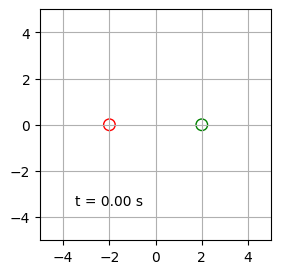

In [25]:
m1 = 1.0
d1 = 0.5
x10 = -2
v10 = 1
y10 = 0
u10 = 0

m2 = 1.0
d2 = 0.5
x20 = 2
v20 = -5
y20 = 0
u20 = 0

# with collision with iteration
x1 = []
y1 = []
x2 = []
y2 = []
for i, tt in enumerate(t):
    if i == 0:
        x1.append(x10)
        y1.append(y10)
        x2.append(x20)
        y2.append(y20)
    else:
        x1.append(x1[i-1] + v10 * dt)
        y1.append(y1[i-1] + u10 * dt)
        x2.append(x2[i-1] + v20 * dt)
        y2.append(y2[i-1] + u20 * dt)

    d = np.abs(x2[i] - x1[i]) < 0.5*(d1 + d2)
    if d:
        v10new = ((m1 - m2)/(m1 + m2)) * v10 + ((2 * m2)/(m1 + m2)) * v20 
        v20new = ((m2 - m1)/(m1 + m2)) * v20 + ((2 * m1)/(m1 + m2)) * v10

        v10 = v10new
        v20 = v20new

fig = plt.figure(figsize=(3,3))
ax = fig.gca()
ax.set_aspect(1)
plt.grid()
plt.xlim(-5, 5)
plt.ylim(-5, 5)

c1 = plt.Circle((x1[0], y1[0]), 0.5*d1, fc='none', ec='red', lw=1)
ax.add_patch(c1)
c2 = plt.Circle((x2[0], y2[0]), 0.5*d2, fc='none', ec='green', lw=1)
ax.add_patch(c2)

ts = f't = {t[0]:.2f} s'
tx = ax.text(-3.5, -3.5, ts)

plt.show()

def update(i):
    c1.center = x1[i], y1[i]
    c2.center = x2[i], y2[i]
    ts = f't = {t[i]:.2f} s'
    tx.set_text(ts)
    return _

ani = animation.FuncAnimation(fig=fig, func=update, frames=300)
ani.save(filename="test2c.mp4", writer="ffmpeg", fps=50)

<video src="test2c.mp4" controls></video>